In [15]:
import numpy as np
import sys
import pyDOE as pyDOE
import corner
import matplotlib.pyplot as plt
from sympy import symbols, Eq

In [16]:
# Parameters
n_params = 7
n_samples = 8000

# parameter ranges:
h = np.linspace(0.64, 0.80, n_samples)
ombh2 = np.linspace(0.0180, 0.0250, n_samples)
omch2 = np.linspace(0.050, 0.250, n_samples)
ns = np.linspace(0.88, 1.05, n_samples)
z = np.linspace(0.0, 5.0, n_samples)
lnAs = np.linspace(2.60, 3.90, n_samples)                  # ln(10^{10}As)
w = np.linspace(-1.5, -0.6, n_samples)                   # eqn of state parameter

%%time
for i in range(2000):
    m = np.exp(2.99+i/100)/(10**10)
    i +=1
    print(m)

In [17]:
# LHS Grid
AllParams = np.vstack([h, ombh2, omch2, ns, z, lnAs, w])
lhd = pyDOE.lhs(n_params, samples=n_samples, criterion=None)
index = (lhd*n_samples).astype(int)

AllCombs = np.zeros((n_samples, n_params))
for i in range(n_params):
    AllCombs[:, i] = AllParams[i][index[:, i]]
    
print(np.shape(AllCombs))
print(np.shape(AllParams))
print(type(AllParams))
print(AllCombs)

(8000, 7)
(7, 8000)
<class 'numpy.ndarray'>
[[ 0.69722715  0.02436992  0.11675834 ...  4.12614077  3.67425928
  -0.93045381]
 [ 0.74127266  0.02361033  0.09795599 ...  4.42992874  2.62714089
  -1.18822353]
 [ 0.6687836   0.02352894  0.23467308 ...  3.21165146  2.7527691
  -0.72669084]
 ...
 [ 0.75991499  0.0183833   0.05407551 ...  2.73096637  3.58893612
  -1.31637705]
 [ 0.71264908  0.02404176  0.14253657 ...  0.12126516  3.53107888
  -1.19621203]
 [ 0.6535817   0.02008801  0.1867921  ...  1.51268909  2.75764471
  -0.78148519]]


In [18]:
params = {'h': AllCombs[:, 0],
          'omega_b': AllCombs[:, 1],
          'omega_cdm': AllCombs[:, 2],
          'ns': AllCombs[:, 3],
          'z': AllCombs[:, 4],
          'lnAs': AllCombs[:, 5],
          'w': AllCombs[:, 6],
}

In [19]:
print(np.shape(params['h']))

(8000,)


In [20]:
np.size(AllCombs)                                                                   # 'n_samples' pts for 'n_params' parameters

56000

In [21]:
type(params)

dict

In [22]:
np.savez('LHS_params_7dim8000.npz', **params)                  # Save several arrays into a single file in uncompressed .npz format.

In [23]:
print(params['h'])
print(params['omega_b'])
print(params['omega_cdm'])
print(params['ns'])
print(params['z'])
print(params['lnAs'])
print(params['w'])
print(np.shape(params['h']))

[0.69722715 0.74127266 0.6687836  ... 0.75991499 0.71264908 0.6535817 ]
[0.02436992 0.02361033 0.02352894 ... 0.0183833  0.02404176 0.02008801]
[0.11675834 0.09795599 0.23467308 ... 0.05407551 0.14253657 0.1867921 ]
[1.00530566 0.89661958 0.88244406 ... 1.00938617 0.94904988 0.96099387]
[4.12614077 4.42992874 3.21165146 ... 2.73096637 0.12126516 1.51268909]
[3.67425928 2.62714089 2.7527691  ... 3.58893612 3.53107888 2.75764471]
[-0.93045381 -1.18822353 -0.72669084 ... -1.31637705 -1.19621203
 -0.78148519]
(8000,)


In [24]:
print(AllParams)
print(np.shape(AllParams))
AllParams_tran = np.transpose(AllParams)
print(np.shape(AllParams_tran))

[[ 6.40000000e-01  6.40020003e-01  6.40040005e-01 ...  7.99959995e-01
   7.99979997e-01  8.00000000e-01]
 [ 1.80000000e-02  1.80008751e-02  1.80017502e-02 ...  2.49982498e-02
   2.49991249e-02  2.50000000e-02]
 [ 5.00000000e-02  5.00250031e-02  5.00500063e-02 ...  2.49949994e-01
   2.49974997e-01  2.50000000e-01]
 ...
 [ 0.00000000e+00  6.25078135e-04  1.25015627e-03 ...  4.99874984e+00
   4.99937492e+00  5.00000000e+00]
 [ 2.60000000e+00  2.60016252e+00  2.60032504e+00 ...  3.89967496e+00
   3.89983748e+00  3.90000000e+00]
 [-1.50000000e+00 -1.49988749e+00 -1.49977497e+00 ... -6.00225028e-01
  -6.00112514e-01 -6.00000000e-01]]
(7, 8000)
(8000, 7)


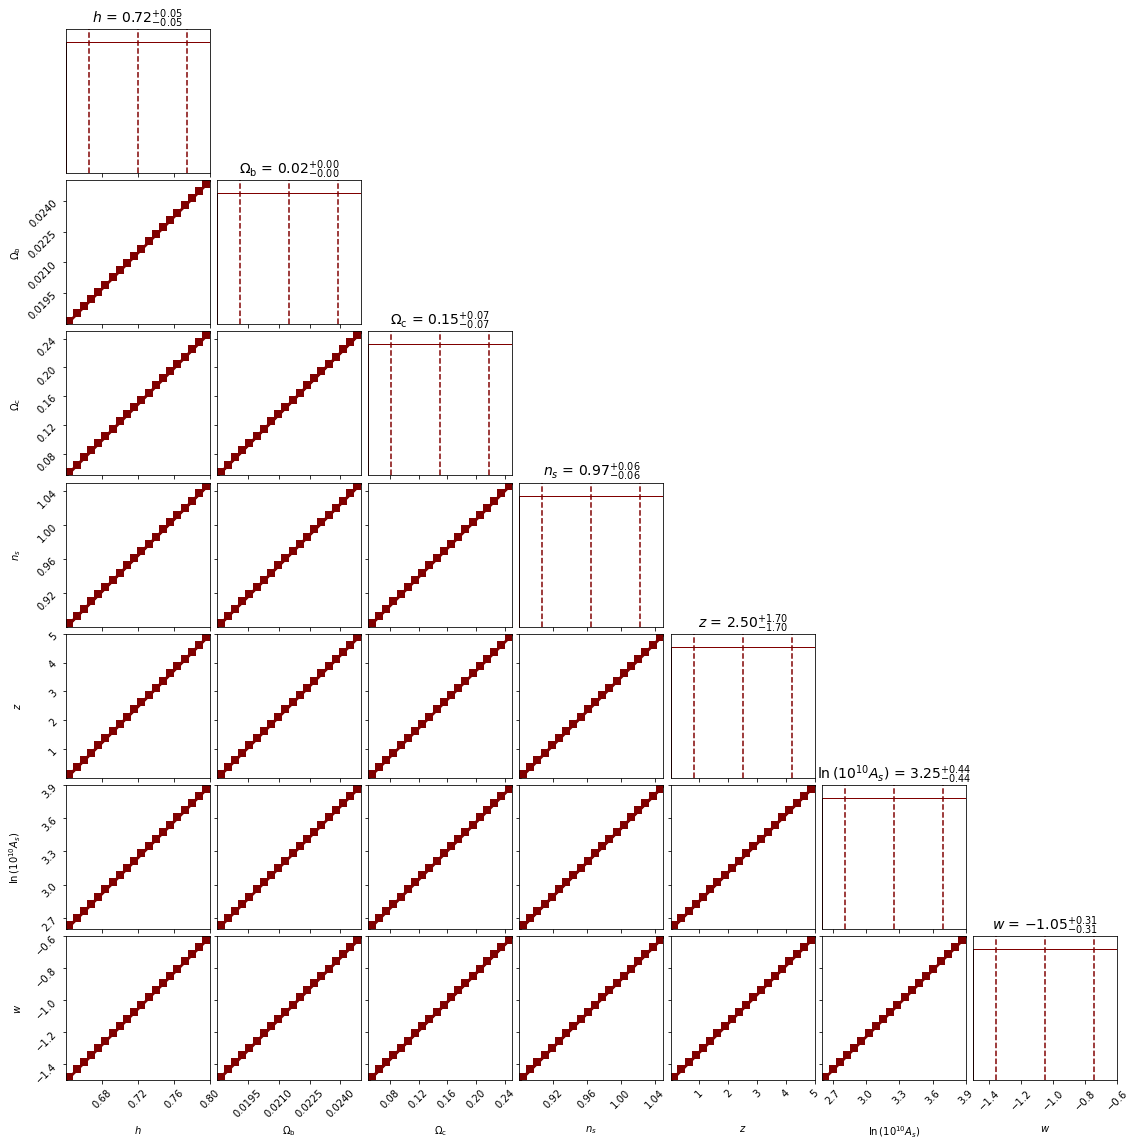

In [25]:
figure = corner.corner(AllParams_tran, labels=[r"$h$", r"$\Omega_{\mathrm{b}}$", r"$\Omega_{\mathrm{c}}$", r"$n_{s}$", r"$z$", r"$\ln{(10^{10}A_{s})}$", r"$w$" ],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True,
                       color='maroon',
                       title_kwargs={"fontsize": 14})